# NLP Capstone Project - Movie Review - Sentiment Analysis -  Classify the sentiment of sentences from the Rotten Tomatoes dataset
## Rotten Tomatoes Reviews Analysis - Classify the sentiment of sentences from the Rotten Tomatoes dataset 


![](https://cdn.steemitimages.com/DQmQZCf7ME7Haj3X3MzXtG8R8JtGmTpuh5NXDSd3wKueva7/rottentomatoes.png)

![EDA](http://www.statistika.co/images/services/Exploratory%20Data%20Analysis%20-%20EDA%201000x468.jpg)

# Exploratory Data Analysis

This Kernel will be the first that will introduce us to the dataset and will try to investigate its features The main strategy that will be followed is the following:
- Loading necessary libraries
- Introductory Dataset investigation
- Observing possible anomalies in the dataset
- Cleaning the Train Set from Noise
- Counting Word Frequencies from Unigrams, Bigrams and Trigrams
- Creating Wordclouds
- Identifying Named Entities
- Applying Unsupervized Learning for the purpose of 
    - Train set reviews’ visualization over the 2-axis using t-SNE
    - K-means clustering over the reviews from train set and visualize the clusters using t-SNE.
    - Topic Detection over the reviews from train set using LDA (Latent Dirichlet Allocation algorithm) and visualize the topics using t-SNE
    - Word Embeddings over the train set and visualize their similarity using t-SNE.
    
    

## Load Libraries
Numerous libraries from data handling to text processing and finally to data vizualization. To be more specific:

Libraries for Data handling:
- pandas
- numpy

Libraries for Text processing:
- sklearn
- nltk
- gensim

Libraries for Vizualization:
- matplotlib
- seaborn
- bokeh
- plotly

In [ ]:
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import nltk

import plotly
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
output_notebook()

In [ ]:
df = pd.read_csv("../input/train.tsv", sep="\t")

In [ ]:
df.head(10)

In [ ]:
df.describe()

PhraseId and SentenceId do not play any role in the analysis since they are both identifiers and incremental numeric features.

In [ ]:
df.isna().sum()

Our dataset does not contain missing values.

### Observing the Train Set for potential anomalies:
Here are couple of instances where punctuations appeared to be predictive.

In [ ]:
example = df[(df['PhraseId'] >= 0) & (df['PhraseId'] <= 2)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

In [ ]:
example = df[(df['PhraseId'] >= 517) & (df['PhraseId'] <= 518)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

Below another example that the appearance punctuation symbol "," is important

In [ ]:
example = df[(df['PhraseId'] >= 68) & (df['PhraseId'] <= 69)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

Below another example that the appearance punctuation symbol "!" is important

In [ ]:
example = df[(df['PhraseId'] >= 10737) & (df['PhraseId'] <= 10738)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

Another strange thing that I discovered is that there are phrases with a single word only and if they disappear at the following phrases the sentiment changes.

In [ ]:
example = df[(df['PhraseId'] >= 22) & (df['PhraseId'] <= 24)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

print()

print(example["Phrase"].values[2], " - Sentiment:", example["Sentiment"].values[2])

In [ ]:
example = df[(df['PhraseId'] >= 46) & (df['PhraseId'] <= 47)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

Another peculiar event that I discovered in the phrases is that they contain words like ** -LRB- and -RRB- **

In [ ]:
example = df[(df['PhraseId'] >= 1225) & (df['PhraseId'] <= 1227)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

print()

print(example["Phrase"].values[2], " - Sentiment:", example["Sentiment"].values[2])

### Thoughts about this anomalies
During EDA I will continue the cleaning process in order to unvail some hidden information from phrases of the reviews but I believe that later during the deployment of Machine Learning and Deep Learning models if I cleanup the trainSet I will lose some predictive power / predictiveness for my models. I will come back to this matter later during the Machine Learning and Deep Learning process.

## Function to create a vocabulary for the phrases from Train Set
Bellow there is a small function which calculates the size of the vocabulary in the Train Set.

### Tokenizing - Slicing down the sentences into words

In [ ]:
def tokenize_the_text(phrases):
    
    from nltk.tokenize import word_tokenize
    from nltk.text import Text
    
    tokens = [word for word in phrases]
    tokens = [word.lower() for word in tokens]
    tokens = [word_tokenize(word) for word in tokens]
    
    return tokens

crude_tokens = tokenize_the_text(df.Phrase)
print(crude_tokens[0:10])

In [ ]:
def create_a_vocab(tokens):
    
    vocab = set()

    for setence in tokens:
        for word in setence:
            vocab.add(word)

    vocab = list(vocab)

    return vocab
    
vocab = create_a_vocab(crude_tokens)

print("Vocabulary size:", len(vocab), "words")

## Sentiment Distribution

In [ ]:
data = [go.Bar(
            x=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'],
            y=df.Sentiment.value_counts().sort_index(), marker=dict(
                color = df.Sentiment.value_counts().sort_index(),colorscale='Viridis',showscale=True,
                reversescale = False
                ))]

plotly.offline.iplot(data, filename='sentiment distribution')

## Most Frequent Unigrams Words before cleaning

In [ ]:
def get_word_count_dict(tokens):
    
    words_count_dict = dict()

    for sentence in tokens:
        for word in sentence:
            if word not in words_count_dict:
                words_count_dict[word] = 1
            else:
                words_count_dict[word] += 1
    
    return words_count_dict


words_count_dict = get_word_count_dict(crude_tokens)

import operator

top_uncleaned_words_df = pd.DataFrame()

top_uncleaned_words_df = top_uncleaned_words_df.append(list(sorted(words_count_dict.items(), key=operator.itemgetter(1), reverse=True)))
top_uncleaned_words_df.columns = ['word', 'frequency']
#print(top_uncleaned_words_df.head(10))

limit = 20

trace1 = go.Bar(
            x=top_uncleaned_words_df.head(limit).word,
            y=top_uncleaned_words_df.head(limit).frequency, marker=dict(
                color = top_uncleaned_words_df.head(limit).frequency,colorscale='Cividis',showscale=True,
                reversescale = False
                ))

layout = dict(title= 'Most Frequent words from train set')

fig=dict(data=[trace1], layout=layout)
plotly.offline.iplot(fig)

We can see that very common words such as "the", "a" "and" etc, appears to be the most common words in the Train Set. Having such a big volume of noise in the Phrases from the reviews can hinders us to find better and more tangible words that actually the people uses. This means that text cleaning for Exploratory Data Analysis is a necessity.

## Most Frequent Bigrams before text cleaning in the Train Set
Lets investigrate the Bigrams, Bigrams are set of 2 words in the phrases of the reviews. Lets see if by countring their frequency can derive some information.

In [ ]:
bigram_dict = dict()
limit = 20

bigrm = list(nltk.bigrams(' '.join(df.Phrase.values).split()))

for elem in bigrm:
    new_elem = ' '.join(elem)
    if new_elem not in bigram_dict:
        bigram_dict[new_elem] = 1
    else:
        bigram_dict[new_elem] += 1  
    
top_uncleaned_bigram_df = pd.DataFrame.from_dict(bigram_dict, orient='index', columns=["frequency"])
top_uncleaned_bigram_df["bigram"] = top_uncleaned_bigram_df.index 
top_uncleaned_bigram_df = top_uncleaned_bigram_df.reset_index(drop=True)
top_uncleaned_bigram_df.sort_values(ascending=False, by="frequency").head(limit)


trace1 = go.Bar(
            y=top_uncleaned_bigram_df.sort_values(ascending=False, by="frequency").head(limit).frequency,
            x=top_uncleaned_bigram_df.sort_values(ascending=False, by="frequency").head(limit).bigram,
    marker=dict(
                color = top_uncleaned_bigram_df.sort_values(ascending=False, by="frequency").head(limit).frequency,colorscale='Cividis',showscale=True,
                reversescale = False
                )
    )

layout = dict(title= 'Top '+str(limit)+' most frequent Bigrams before cleaning')
fig=dict(data=[trace1], layout=layout)
plotly.offline.iplot(fig)

top_uncleaned_bigram_df.sort_values(ascending=False, by="frequency").head(limit)

We can see that still very common words such as "the", "a" "and" etc, appears to be the most common words in the Train Set. However we can see now that instead of theses noizy words the word "movie" and "film" start to appear in high frequencies. This means that these words may play a vital use in phrases and this may be discovered after cleaning.

## Most Frequent Trigrams before text cleaning in the Train Set
Lets investigrate the Trigrams, Bigrams are set of 3 words in the phrases of the reviews. Lets see if by countring their frequency can derive some information.

In [ ]:
trigram_dict = dict()
limit = 20

trigrm = list(nltk.trigrams(' '.join(df.Phrase.values).split()))

for elem in trigrm:
    new_elem = ' '.join(elem)
    if new_elem not in trigram_dict:
        trigram_dict[new_elem] = 1
    else:
        trigram_dict[new_elem] += 1


top_uncleaned_trigram_df = pd.DataFrame.from_dict(trigram_dict, orient='index', columns=["frequency"])
top_uncleaned_trigram_df["bigram"] = top_uncleaned_trigram_df.index 
top_uncleaned_trigram_df = top_uncleaned_trigram_df.reset_index(drop=True)
top_uncleaned_trigram_df.sort_values(ascending=False, by="frequency").head(limit)


trace1 = go.Bar(
            y=top_uncleaned_trigram_df.sort_values(ascending=False, by="frequency").head(limit).frequency,
            x=top_uncleaned_trigram_df.sort_values(ascending=False, by="frequency").head(limit).bigram,
    marker=dict(
                color = top_uncleaned_trigram_df.sort_values(ascending=False, by="frequency").head(limit).frequency,colorscale='Cividis',showscale=True,
                reversescale = False
                )
    )

layout = dict(title= 'Top '+str(limit)+' most frequent Trigrams before cleaning')
fig=dict(data=[trace1], layout=layout)
plotly.offline.iplot(fig)

top_uncleaned_trigram_df.sort_values(ascending=False, by="frequency").head(limit)

We can see and in trigrams that still very common words such as "the", "a" "and" etc, appears to be the most common words in the Train Set. However we can see now that instead of theses noizy words the word "movie" and "film" start to appear in high frequencies. This means that these words may play a vital use in phrases and this may be discovered after cleaning. Finally punctuation appears in high frequencies and they must be removed during Text cleaning.

## Text Cleaning
The process that will be followed during cleaning is the following:
1. Remove redudant space, custom word simplification and removing punctuation
2. Remove Stopwords
3. Lemmatize the Phrases

### Define a function to clean the text from noizy text data such as: 

- trimming spacing
- removing redudant punctuation
- substituting text to a plain form e.g.: won't -> will not

In [ ]:
def custom_initial_clean(df):

    phrases_X = df.Phrase.copy()

    phrases_X = phrases_X.str.replace('\\*', ' ', regex=True)
    phrases_X = phrases_X.str.replace('\\/', ' ', regex=True)
    phrases_X = phrases_X.str.replace('\\\\', ' ', regex=True)
    phrases_X = phrases_X.str.replace('-', ' ', regex=True)
    phrases_X = phrases_X.str.replace(r'/', ' ', regex=True)
    phrases_X = phrases_X.str.replace(r'``', ' ', regex=True)
    phrases_X = phrases_X.str.replace(r'`', ' ', regex=True)
    phrases_X = phrases_X.str.replace(r"''", ' ', regex=True)
    phrases_X = phrases_X.str.replace(r",", ' ', regex=True)
    phrases_X = phrases_X.str.replace(r"\.$", ' ', regex=True)
    phrases_X = phrases_X.str.replace(r":", ' ', regex=True)
    phrases_X = phrases_X.str.replace(r"# ", '#', regex=True)
    phrases_X = phrases_X.str.replace(r";", ' ', regex=True)
    phrases_X = phrases_X.str.replace(r"?", ' ', regex=True)
    phrases_X = phrases_X.str.replace(r"=", ' ', regex=True)
    phrases_X = phrases_X.str.replace("...", ' ', regex=False)
    phrases_X = phrases_X.str.replace("..", ' ', regex=False)

    phrases_X = phrases_X.str.replace(r'LRB', ' ', regex=True)
    phrases_X = phrases_X.str.replace(r'RRB', ' ', regex=True)
    phrases_X = phrases_X.str.replace(r"[C|c]a n't", 'cannot', regex=True)
    phrases_X = phrases_X.str.replace(r"[W|w]o n't", 'will not', regex=True)
    phrases_X = phrases_X.str.replace(r"[W|w]ere n't", 'were not', regex=True)
    phrases_X = phrases_X.str.replace(r"[W|w]as n't", 'was not', regex=True)
    phrases_X = phrases_X.str.replace(r"[W|w]ould n't", 'would not', regex=True)
    phrases_X = phrases_X.str.replace(r"[D|d]oes n't", 'does not', regex=True)
    phrases_X = phrases_X.str.replace(r"[I|i]s n't", 'is not', regex=True)
    phrases_X = phrases_X.str.replace(r"[C|c]ould n't", 'could not', regex=True)
    phrases_X = phrases_X.str.replace(r"[D|d]id n't", 'did not', regex=True)
    phrases_X = phrases_X.str.replace(r"[H|h]as n't", 'has not', regex=True)
    phrases_X = phrases_X.str.replace(r"[H|h]ave n't", 'have not', regex=True)
    phrases_X = phrases_X.str.replace(r"[D|d]o n't", 'do not', regex=True)
    phrases_X = phrases_X.str.replace(r"[A|a]i n't", "not", regex=True)
    phrases_X = phrases_X.str.replace(r"[N|n]eed n't", "need not", regex=True)
    phrases_X = phrases_X.str.replace(r"[A|a]re n't", "are not", regex=True)
    phrases_X = phrases_X.str.replace(r"[S|s]hould n't", "should not", regex=True)
    phrases_X = phrases_X.str.replace(r"[H|h]ad n't", "had not", regex=True)

    phrases_X = phrases_X.str.replace(" 's", " ", regex=False)
    phrases_X = phrases_X.str.replace("'s", "", regex=False)
    phrases_X = phrases_X.str.replace("'ve", "have", regex=False)
    phrases_X = phrases_X.str.replace("'d", "would", regex=False)
    phrases_X = phrases_X.str.replace("'ll", "will", regex=False)
    phrases_X = phrases_X.str.replace("'m", "am", regex=False)
    phrases_X = phrases_X.str.replace("'n", "and", regex=False)
    phrases_X = phrases_X.str.replace("'re", "are", regex=False)
    phrases_X = phrases_X.str.replace("'til", "until", regex=False)
    phrases_X = phrases_X.str.replace(" ' ", " ", regex=False)
    phrases_X = phrases_X.str.replace(" '", " ", regex=False)

    phrases_X = phrases_X.str.replace(r'[ ]{2,}', ' ', regex=True)

    return phrases_X

phrases_X = custom_initial_clean(df)

In [ ]:
def tokenize_the_text(phrases):
    
    from nltk.tokenize import word_tokenize
    from nltk.text import Text
    
    tokens = [word for word in phrases]
    tokens = [word.lower() for word in tokens]
    tokens = [word_tokenize(word) for word in tokens]
    
    return tokens

In [ ]:
tokens_custom_cleaned = tokenize_the_text(phrases_X)

### Calculating new vocabulary after cleaning
Lets see after custom initial Text cleaning in the Train Set how many words are left now.

In [ ]:
vocab = create_a_vocab(tokens_custom_cleaned)

print("Vocabulary size after custom cleaning:", len(vocab), "words")

### Removing Stopwords
stop words are words which are filtered out before or after processing of natural language data (text). Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search [source](https://en.wikipedia.org/wiki/Stop_words).

In [ ]:
def removing_stopwords(tokens_custom_cleaned):

    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    tokens_custom_cleaned_and_without_stopwords = []
    for sentence in tokens_custom_cleaned:
        tokens_custom_cleaned_and_without_stopwords.append([word for word in sentence if word not in stop_words])
        
    return tokens_custom_cleaned_and_without_stopwords

tokens_custom_cleaned_and_without_stopwords = removing_stopwords(tokens_custom_cleaned)

In [ ]:
vocab = create_a_vocab(tokens_custom_cleaned_and_without_stopwords)

print("Vocabulary size after custom cleaning and removing stopwords:", len(vocab), "words")

### Lemmatizing the Phrases
The goal of Lemmatization is to reduce and return forms of words to a common base form. For instance:

am, are, is $\Rightarrow$ be 
car, cars, car's, cars' $\Rightarrow$ car

[source](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

In [ ]:
def lemmatizing_the_tokens(tokens_custom_cleaned_and_without_stopwords):

    from nltk.stem.wordnet import WordNetLemmatizer 
    lem = WordNetLemmatizer()

    tokens_custom_cleaned_and_without_stopwords_and_lemmatized = []

    for sentence in tokens_custom_cleaned_and_without_stopwords:
        tokens_custom_cleaned_and_without_stopwords_and_lemmatized.append([lem.lemmatize(word, pos='v') for word in sentence])
        
    return tokens_custom_cleaned_and_without_stopwords_and_lemmatized


tokens_custom_cleaned_and_without_stopwords_and_lemmatized = lemmatizing_the_tokens(tokens_custom_cleaned_and_without_stopwords)

In [ ]:
vocab = create_a_vocab(tokens_custom_cleaned_and_without_stopwords_and_lemmatized)

print("Vocabulary size after custom cleaning, removing stopwords and lemmatizing the text:", len(vocab), "words")

We can see that amazingly after text cleaning the size of words were reduced from 16540 to 12622!

### Longest Words
Lets find out just out of curiocity what are the longest words in the Train Set.

In [ ]:
from collections import defaultdict

longest_words_dict = defaultdict(list)

for word in vocab:
        longest_words_dict[str(len(word))].append(word)

In [ ]:
print("The Biggest number of characters with the longest words in the Train Set is:", 
      max([int(elem) for elem in list(longest_words_dict.keys())]))
print(longest_words_dict[str(max([int(elem) for elem in list(longest_words_dict.keys())]))])

print()

print("The Second biggest number of characters with the longest words in the Train Set is:", 
      max([int(elem) for elem in list(longest_words_dict.keys())]) - 1)
print(longest_words_dict[str(max([int(elem) for elem in list(longest_words_dict.keys())])-1)])

print()

print("The Third biggest number of characters with the longest words in the Train Set is:", 
      max([int(elem) for elem in list(longest_words_dict.keys())]) - 2)
print(longest_words_dict[str(max([int(elem) for elem in list(longest_words_dict.keys())])-2)])

### WorldCloud
Now that the phrases from the Train Set are cleaned, lets create a worldcloud to vizualize the impact of the frequency of the cleaned words. 

In [ ]:
processed_text = [(' '.join(sentence)) for sentence in tokens_custom_cleaned_and_without_stopwords_and_lemmatized]
whole_reviews = ' '.join(processed_text)


# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=180, max_words=100, width=800, height=600).generate(whole_reviews)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud per sentiment
Lets do the same but per sentiment

In [ ]:
#np.shape(processed_text)
processed_df = pd.DataFrame(columns=["Phrase", "Sentiment"])
processed_df.Phrase = processed_text
processed_df.Sentiment = df.Sentiment.values


fig,axes = plt.subplots(3, 2, figsize=(30, 15))

temp = processed_df[processed_df.Sentiment == 0].Phrase
whole_reviews = ' '.join(temp)

wordcloud_1 = WordCloud(max_font_size=180, max_words=100, width=800, height=600).generate(whole_reviews)

ax = axes[0, 0]
ax.imshow(wordcloud_1, interpolation="bilinear")
ax.axis('off')
ax.set_title("Sentiment 0 - negative, Wordcloud", fontsize=30)

temp = processed_df[processed_df.Sentiment == 1].Phrase
whole_reviews = ' '.join(temp)

wordcloud_2 = WordCloud(max_font_size=180, max_words=100, width=800, height=600).generate(whole_reviews)

ax = axes[0, 1]
ax.imshow(wordcloud_2, interpolation="bilinear")
ax.axis('off')
ax.set_title("Sentiment 1 - somewhat negative, Wordcloud", fontsize=30)

temp = processed_df[processed_df.Sentiment == 2].Phrase
whole_reviews = ' '.join(temp)

wordcloud_3 = WordCloud(max_font_size=180, max_words=100, width=800, height=600).generate(whole_reviews)

ax = axes[1, 0]
ax.imshow(wordcloud_3, interpolation="bilinear")
ax.axis('off')
ax.set_title("Sentiment 2 - neutral, Wordcloud", fontsize=30)

temp = processed_df[processed_df.Sentiment == 3].Phrase
whole_reviews = ' '.join(temp)

wordcloud_4 = WordCloud(max_font_size=180, max_words=100, width=800, height=600).generate(whole_reviews)

ax = axes[1, 1]
ax.imshow(wordcloud_4, interpolation="bilinear")
ax.axis('off')
ax.set_title("Sentiment 3 - somewhat positive, Wordcloud", fontsize=30)


temp = processed_df[processed_df.Sentiment == 4].Phrase
whole_reviews = ' '.join(temp)

wordcloud_5 = WordCloud(max_font_size=180, max_words=100, width=800, height=600).generate(whole_reviews)

ax = axes[2, 0]
ax.imshow(wordcloud_5, interpolation="bilinear")
ax.axis('off')
ax.set_title("Sentiment 4 - positive, Wordcloud", fontsize=30)


axes[-1, -1].axis('off')
plt.show()



### Top 20 word Frequencies after text cleaning
Going back to word frequencies. Lets view the top 20 word frequencies after text cleaning in the train Set

In [ ]:
top_cleaned_words_df = pd.DataFrame()

top_cleaned_words_df = top_cleaned_words_df.append(list(sorted(get_word_count_dict(tokens_custom_cleaned_and_without_stopwords_and_lemmatized).items(), key=operator.itemgetter(1), reverse=True)))
top_cleaned_words_df.columns = ['word', 'frequency']
#print(top_cleaned_words_df.head(10))

limit = 20

trace1 = go.Bar(
            x=top_cleaned_words_df.head(limit).word,
            y=top_cleaned_words_df.head(limit).frequency,
    marker=dict(
                color = top_cleaned_words_df.head(limit).frequency,colorscale='Cividis',showscale=True,
                reversescale = False
                )
    )

layout = dict(title= 'Top '+str(limit)+' most frequent words after cleaning')
fig=dict(data=[trace1], layout=layout)
plotly.offline.iplot(fig)

After cleaning we can see that more tangible information can be derived. We can see that what words are used from phrases from the movie reviews. 

After cleaning another question is whats the frequency of words per sentiment after the cleanup of the trainset

### Top 20 word Frequencies after text cleaning per Sentiment  - **  Sentiment 0 - Negative **
After cleaning another question is whats the frequency of words per sentiment after the cleanup of the trainset

In [ ]:
temp = tokenize_the_text(processed_df[processed_df.Sentiment == 0].Phrase)
top_cleaned_words_df = pd.DataFrame()

top_cleaned_words_df = top_cleaned_words_df.append(list(sorted(get_word_count_dict(temp).items(), key=operator.itemgetter(1), reverse=True)))
top_cleaned_words_df.columns = ['word', 'frequency']

limit = 20

trace1 = go.Bar(
            x=top_cleaned_words_df.head(limit).word,
            y=top_cleaned_words_df.head(limit).frequency,
    marker=dict(
                color = top_cleaned_words_df.head(limit).frequency,colorscale='Cividis',showscale=True,
                reversescale = False
                )
    )

layout = dict(title= 'Top '+str(limit)+' most frequent words after cleaning for sentiment 0')
fig=dict(data=[trace1], layout=layout)
plotly.offline.iplot(fig)

### Top 20 word Frequencies after text cleaning per Sentiment  - **  Sentiment 1 - somewhat Negative **
After cleaning another question is whats the frequency of words per sentiment after the cleanup of the trainset

In [ ]:
temp = tokenize_the_text(processed_df[processed_df.Sentiment == 1].Phrase)
top_cleaned_words_df = pd.DataFrame()

top_cleaned_words_df = top_cleaned_words_df.append(list(sorted(get_word_count_dict(temp).items(), key=operator.itemgetter(1), reverse=True)))
top_cleaned_words_df.columns = ['word', 'frequency']

limit = 20

trace1 = go.Bar(
            x=top_cleaned_words_df.head(limit).word,
            y=top_cleaned_words_df.head(limit).frequency,
    marker=dict(
                color = top_cleaned_words_df.head(limit).frequency,colorscale='Cividis',showscale=True,
                reversescale = False
                )
    )

layout = dict(title= 'Top '+str(limit)+' most frequent words after cleaning  for sentiment 1')
fig=dict(data=[trace1], layout=layout)
plotly.offline.iplot(fig)

### Top 20 word Frequencies after text cleaning per Sentiment  - **  Sentiment 2 - Neutral**
After cleaning another question is whats the frequency of words per sentiment after the cleanup of the trainset

In [ ]:
temp = tokenize_the_text(processed_df[processed_df.Sentiment == 2].Phrase)
top_cleaned_words_df = pd.DataFrame()

top_cleaned_words_df = top_cleaned_words_df.append(list(sorted(get_word_count_dict(temp).items(), key=operator.itemgetter(1), reverse=True)))
top_cleaned_words_df.columns = ['word', 'frequency']

limit = 20

trace1 = go.Bar(
            x=top_cleaned_words_df.head(limit).word,
            y=top_cleaned_words_df.head(limit).frequency,
    marker=dict(
                color = top_cleaned_words_df.head(limit).frequency,colorscale='Cividis',showscale=True,
                reversescale = False
                )
    )

layout = dict(title= 'Top '+str(limit)+' most frequent words after cleaning  for sentiment 2')
fig=dict(data=[trace1], layout=layout)
plotly.offline.iplot(fig)

### Top 20 word Frequencies after text cleaning per Sentiment  - **  Sentiment 3 - Somewhat Positive **
After cleaning another question is whats the frequency of words per sentiment after the cleanup of the trainset

In [ ]:
temp = tokenize_the_text(processed_df[processed_df.Sentiment == 3].Phrase)
top_cleaned_words_df = pd.DataFrame()

top_cleaned_words_df = top_cleaned_words_df.append(list(sorted(get_word_count_dict(temp).items(), key=operator.itemgetter(1), reverse=True)))
top_cleaned_words_df.columns = ['word', 'frequency']

limit = 20

trace1 = go.Bar(
            x=top_cleaned_words_df.head(limit).word,
            y=top_cleaned_words_df.head(limit).frequency,
    marker=dict(
                color = top_cleaned_words_df.head(limit).frequency,colorscale='Cividis',showscale=True,
                reversescale = False
                )
    )

layout = dict(title= 'Top '+str(limit)+' most frequent words after cleaning  for sentiment 3')
fig=dict(data=[trace1], layout=layout)
plotly.offline.iplot(fig)

### Top 20 word Frequencies after text cleaning per Sentiment  - **  Sentiment 4 - Positive **
After cleaning another question is whats the frequency of words per sentiment after the cleanup of the trainset

In [ ]:
temp = tokenize_the_text(processed_df[processed_df.Sentiment == 4].Phrase)
top_cleaned_words_df = pd.DataFrame()

top_cleaned_words_df = top_cleaned_words_df.append(list(sorted(get_word_count_dict(temp).items(), key=operator.itemgetter(1), reverse=True)))
top_cleaned_words_df.columns = ['word', 'frequency']

limit = 20

trace1 = go.Bar(
            x=top_cleaned_words_df.head(limit).word,
            y=top_cleaned_words_df.head(limit).frequency,
    marker=dict(
                color = top_cleaned_words_df.head(limit).frequency,colorscale='Cividis',showscale=True,
                reversescale = False
                )
    )

layout = dict(title= 'Top '+str(limit)+' most frequent words after cleaning for sentiment 4')
fig=dict(data=[trace1], layout=layout)
plotly.offline.iplot(fig)

### Bigrams after Cleaning
Movinig on to bigrams, let us find out what set of words are used for review after cleaning.

In [ ]:
bigram_dict = dict()
limit = 20

bigrm = list(nltk.bigrams(whole_reviews.split()))

for elem in bigrm:
    new_elem = ' '.join(elem)
    if new_elem not in bigram_dict:
        bigram_dict[new_elem] = 1
    else:
        bigram_dict[new_elem] += 1
        
    
top_cleaned_bigram_df = pd.DataFrame.from_dict(bigram_dict, orient='index', columns=["frequency"])
top_cleaned_bigram_df["bigram"] = top_cleaned_bigram_df.index 
top_cleaned_bigram_df = top_cleaned_bigram_df.reset_index(drop=True)
top_cleaned_bigram_df.sort_values(ascending=False, by="frequency").head(limit)


trace1 = go.Bar(
            y=top_cleaned_bigram_df.sort_values(ascending=False, by="frequency").head(limit).frequency,
            x=top_cleaned_bigram_df.sort_values(ascending=False, by="frequency").head(limit).bigram,
    marker=dict(
                color = top_cleaned_bigram_df.sort_values(ascending=False, by="frequency").head(limit).frequency,colorscale='Cividis',showscale=True,
                reversescale = False
                )
    )

layout = dict(title= 'Top '+str(limit)+' most frequent Bigrams after cleaning')
fig=dict(data=[trace1], layout=layout)
plotly.offline.iplot(fig)

Text cleaning was very efficient, New set words were emerged such as "one best" and "best film" that are used frequently for reviewing the movies.

### Trigrams after cleaning
Movinig on to trigrams, let us find out what triplets of words are used for movie reviews after cleaning.

In [ ]:
trigram_dict = dict()


trigrm = list(nltk.trigrams(whole_reviews.split()))

for elem in trigrm:
    if elem not in bigram_dict:
        trigram_dict[elem] = 1
    else:
        trigram_dict[elem] += 1

top_cleaned_trigram_df = pd.DataFrame.from_dict(trigram_dict, orient='index', columns=["frequency"])
top_cleaned_trigram_df["trigram"] = top_cleaned_trigram_df.index 
top_cleaned_trigram_df = top_cleaned_trigram_df.reset_index(drop=True)
top_cleaned_trigram_df.sort_values(ascending=False, by="frequency").head(10)


There is nothing to report here, there are no frequent triplets of words that are used in cleaned movie reviews more than once.

### Named Entity Detection / Recognition
Named-entity recognition is a task of information extraction that seeks to locate and classify named entity mentions in unstructured text into pre-defined categories such as the person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc [source](https://en.wikipedia.org/wiki/Named-entity_recognition).

In [ ]:
def get_ne_dict(tokens):
    
    from collections import defaultdict
    ne_dict = defaultdict(list)
    
    for sent in tokens_custom_cleaned_and_without_stopwords_and_lemmatized:
        for entity in nltk.ne_chunk(nltk.pos_tag(sent), binary=False):
            if len(entity) != 2:
                ne_dict[entity.label()].append(entity[0][0])
            
                
    return ne_dict

import operator

ne_dict = get_ne_dict(tokens_custom_cleaned_and_without_stopwords_and_lemmatized)

In [ ]:
for elem in ne_dict.items():
    print(elem[0],":", set(elem[1]))

NLTK's Named Entity Recognition function identified the above entities inside the phrases from the Train Set.

### Identifying most significant / important words in Phrases from reviews from Train Set using TF-IDF


tf-idf is the acronym for Term Frequency–inverse Document Frequency. It quantifies the importance of a particular word in relative to the vocabulary of a collection of documents or corpus. The metric depends on two factors:

Term Frequency: the occurences of a word in a given document (i.e. bag of words)
Inverse Document Frequency: the reciprocal number of times a word occurs in a corpus of documents
Think about of it this way: If the word is used extensively in all documents, its existence within a specific document will not be able to provide us much specific information about the document itself. So the second term could be seen as a penalty term that penalizes common words such as "a", "the", "and", etc. tf-idf can therefore, be seen as a weighting scheme for words relevancy in a specific document.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, lowercase=True, ngram_range=(1, 2))


processed_text = [(' '.join(sentence)) for sentence in tokens_custom_cleaned_and_without_stopwords_and_lemmatized]
vz = vectorizer.fit_transform(processed_text)

vz is a tfidf matrix where:

the number of rows is the total number of phrases

the number of columns is the total number of unique tokens across the phrases

Below is the 10 tokens with the lowest tfidf score, which is unsurprisingly, very generic words that we could not use to distinguish one description from another.

In [ ]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

Below is the 10 tokens with the highest tfidf score, which includes words that are a lot specific that by looking at them

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

Lets find out most significant and specialized words per sentiment after cleaning in the phrases of the reviews.

### TF - IDF vectorizer per Sentiment  - ** Sentiment 0 - Negative **

In [ ]:
temp_tokens = tokenize_the_text(processed_df[processed_df.Sentiment == 0].Phrase)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_sent = TfidfVectorizer(min_df=5, lowercase=True, ngram_range=(1, 2))


processed_text_sent = [(' '.join(sentence)) for sentence in temp_tokens]
vz_sent = vectorizer_sent.fit_transform(processed_text_sent)

tfidf_sent = dict(zip(vectorizer_sent.get_feature_names(), vectorizer_sent.idf_))
tfidf_sent = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf_sent), orient='index')
tfidf_sent.columns = ['tfidf']

tfidf_sent.sort_values(by=['tfidf'], ascending=False).head(10)

### TF - IDF vectorizer per Sentiment  - ** Sentiment 1 - somewhat negative **

In [ ]:
temp_tokens = tokenize_the_text(processed_df[processed_df.Sentiment == 1].Phrase)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_sent = TfidfVectorizer(min_df=5, lowercase=True, ngram_range=(1, 2))


processed_text_sent = [(' '.join(sentence)) for sentence in temp_tokens]
vz_sent = vectorizer_sent.fit_transform(processed_text_sent)

tfidf_sent = dict(zip(vectorizer_sent.get_feature_names(), vectorizer_sent.idf_))
tfidf_sent = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf_sent), orient='index')
tfidf_sent.columns = ['tfidf']

tfidf_sent.sort_values(by=['tfidf'], ascending=False).head(10)

### TF - IDF vectorizer per Sentiment  - ** Sentiment 2 - Neutral ** 

In [ ]:
temp_tokens = tokenize_the_text(processed_df[processed_df.Sentiment == 2].Phrase)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_sent = TfidfVectorizer(min_df=5, lowercase=True, ngram_range=(1, 2))


processed_text_sent = [(' '.join(sentence)) for sentence in temp_tokens]
vz_sent = vectorizer_sent.fit_transform(processed_text_sent)

tfidf_sent = dict(zip(vectorizer_sent.get_feature_names(), vectorizer_sent.idf_))
tfidf_sent = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf_sent), orient='index')
tfidf_sent.columns = ['tfidf']

tfidf_sent.sort_values(by=['tfidf'], ascending=False).head(10)

### TF - IDF vectorizer per Sentiment  - ** Sentiment 3 - Somewhat Positive **

In [ ]:
temp_tokens = tokenize_the_text(processed_df[processed_df.Sentiment == 3].Phrase)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_sent = TfidfVectorizer(min_df=5, lowercase=True, ngram_range=(1, 2))


processed_text_sent = [(' '.join(sentence)) for sentence in temp_tokens]
vz_sent = vectorizer_sent.fit_transform(processed_text_sent)

tfidf_sent = dict(zip(vectorizer_sent.get_feature_names(), vectorizer_sent.idf_))
tfidf_sent = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf_sent), orient='index')
tfidf_sent.columns = ['tfidf']

tfidf_sent.sort_values(by=['tfidf'], ascending=False).head(10)

### TF - IDF vectorizer per Sentiment  - ** Sentiment 4 - Positive **

In [ ]:
temp_tokens = tokenize_the_text(processed_df[processed_df.Sentiment == 4].Phrase)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_sent = TfidfVectorizer(min_df=5, lowercase=True, ngram_range=(1, 2))


processed_text_sent = [(' '.join(sentence)) for sentence in temp_tokens]
vz_sent = vectorizer_sent.fit_transform(processed_text_sent)

tfidf_sent = dict(zip(vectorizer_sent.get_feature_names(), vectorizer_sent.idf_))
tfidf_sent = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf_sent), orient='index')
tfidf_sent.columns = ['tfidf']

tfidf_sent.sort_values(by=['tfidf'], ascending=False).head(10)

_____________________________________
# Unsupervised Learning

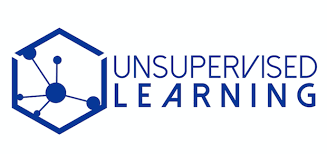

### Vizualizing reviews using TrancatedSVD and t-SNE
Moving on to Unsupervised Learning, the idea is to vizualize the phrases from reviews of the Train Set in a 2 axis plot. So t-SNE comes in handy here.

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results [source](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

I use SVD This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.

First, let's reduce the dimension of the Train Set from TF-IDF vectorizer matrix to n_components (30) using SVD.

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_comp=30
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(vz)

#### t-Distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. The goal is to take a set of points in a high-dimensional space and find a representation of those points in a lower-dimensional space, typically the 2D plane. It is based on probability distributions with random walk on neighborhood graphs to find the structure within the data. But since t-SNE complexity is significantly high, usually we'd use other high-dimension reduction techniques before applying t-SNE.

Given the high dimension of our tfidf matrix, we need to reduce their dimension using the Singular Value Decomposition (SVD) technique. And to visualize our vocabulary, we could next use t-SNE to reduce the dimension from 30 to 2. t-SNE is more suitable for dimensionality reduction to 2 or 3.

In [ ]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

It's now possible to visualize our data points. Note that the deviation as well as the size of the clusters imply little information in t-SNE.

### Train set reviews’ visualization over the 2-axis using t-SNE.

In [ ]:
plot_df = pd.DataFrame(columns=["x", "y", "text"])
plot_df.x = tsne_tfidf[:,0]
plot_df.y = tsne_tfidf[:,1]
plot_df.text = processed_text

source = ColumnDataSource(data=dict(x=plot_df['x'], y=plot_df['y'],
                                    text=plot_df['text']))


plot_tfidf = figure(plot_width=700, plot_height=600,
                        title="Tf-IDF text to features representation using tSNE",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_tfidf.scatter(source = source, x='x', y='y', color='#4286f4')
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"text": "@text" }
output_file("Train_set_reviews_visualization_over_the_2-axis_using_t-SNE.html")
show(plot_tfidf)

Based on the vizualization above, we can see neighborhoods of phrases, since t-SNE depicts the phrases based on 

## Unsupervised Learning - Clustering the reviews with Kmeans and t-SNE vizualization
K-means clustering obejctive is to minimize the average squared Euclidean distance of the document / description from their cluster centroids. At first lets find the optimal number of clusters that fit to the phrases in the train set and evaluate cluster's with silhouette score. The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters [source](https://en.wikipedia.org/wiki/Silhouette_(clustering).

Mini batch Kmeans was prefer to Kmeans because the former uses small random batches of examples of a fixed size so they can be stored in memory. Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence [source](https://www.google.com/search?q=mini+batch+k+means+vs+k+means&oq=mini+batch+k+means+vs+k+means&aqs=chrome..69i57.5712j0j1&sourceid=chrome&ie=UTF-8).

### Kmeans grid search
Find the optimal number of clusters and evaluate clustering via silhouette score.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import MiniBatchKMeans


range_n_clusters = [6, 8, 10, 12, 14, 16, 18]

cluster_grid_df = pd.DataFrame(columns=["cluster_size", "silhouette_score"])

for num_clusters in range_n_clusters:
    
    kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means++',
                               n_init=1,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000, random_state=42)

    kmeans = kmeans_model.fit(vz)
    kmeans_clusters = kmeans.predict(vz)
    silhouette_avg = silhouette_score(vz, kmeans_clusters)
    print("For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_avg)
    cluster_grid_df = cluster_grid_df.append({'cluster_size': num_clusters, 'silhouette_score': silhouette_avg}, ignore_index=True)

In [ ]:
num_clusters = int(cluster_grid_df[np.abs(cluster_grid_df.silhouette_score) == np.max(cluster_grid_df.silhouette_score)].cluster_size)


kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means++',
                               n_init=1,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000, random_state=42)

kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

### Representative terms per cluster center (cluster center)

In [ ]:
num_clusters = int(cluster_grid_df[np.abs(cluster_grid_df.silhouette_score) == np.max(cluster_grid_df.silhouette_score)].cluster_size)

print("Representative terms per cluster center:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    center_cluster_str_words = []
    for ind in order_centroids[i, :10]:
        str = "".join(terms[ind])
        center_cluster_str_words.append(str)
    print(' %s' % "|".join(center_cluster_str_words))
    print()

In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, init='pca', random_state=42, n_iter=500)

tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

In [ ]:

colormap = np.array([
    "#000080", "#00BFFF", "#008000", "#808000", "#FF8C00",
    "#FF7F50", "#4ba04e", "#FF6347", "#A9A9A9", "#808080",
    "#ADD8E6", "#FF00FF", "#90EE90", "#C0C0C0", "#FF00FF",
    "#008080", "#4169E1", "#BDB76B", "#F0FFF0", "#F4A460",
    "#4B0082", "#FA8072", "#9ACD32", "#7CFC00", "#DDA0DD",
    "#A52A2A", "#F5F5DC", "#FFEFD5", "#008080", "#000000"
])


plot_df = pd.DataFrame(columns=["x", "y", "text", "cluster"])
plot_df.x = tsne_kmeans[:,0]
plot_df.y = tsne_kmeans[:,1]
plot_df.text = processed_text
plot_df.cluster = kmeans_clusters

source = ColumnDataSource(data=dict(x=plot_df['x'], y=plot_df['y'],
                                    cluster=plot_df['cluster'],
                                    color=colormap[kmeans_clusters],
                                    text=plot_df['text']))


plot_kmeans = figure(plot_width=700, plot_height=600,
                        title="KMeans clustering of the description",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_kmeans.scatter(source = source, x='x', y='y', color='color')
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"text": "@text", "cluster":"@cluster" }
output_file("K-means_reviews_clustering_t-SNE_vizualization.html")
show(plot_kmeans)

## Unsupervised Learning - Topic Modeling with the reviews using LDA and t-SNE vizualization
Latent Dirichlet Allocation (LDA) is an algorithms used to discover the topics that are present in a corpus.

LDA starts from a fixed number of topics. Each topic is represented as a distribution over words, and each document is then represented as a distribution over topics. Although the tokens themselves are meaningless, the probability distributions over words provided by the topics provide a sense of the different ideas contained in the documents.

Reference: https://medium.com/intuitionmachine/the-two-paths-from-natural-language-processing-to-artificial-intelligence-d5384ddbfc18

Both K-means and Latent Dirichlet Allocation (LDA) are unsupervised learning algorithms, where the user needs to decide a priori the parameter K, respectively the number of clusters and the number of topics.

If both are applied to assign K topics to a set of N documents, the most evident difference is that K-means is going to partition the N documents in K disjoint clusters (i.e. topics in this case). On the other hand, LDA assigns a document to a mixture of topics. Therefore each document is characterized by one or more topics (e.g. Document D belongs for 60% to Topic A, 30% to topic B and 10% to topic E). Hence, LDA can give more realistic results than k-means for topic assignment [source](https://www.quora.com/What-are-the-differences-and-similarities-between-LDA-and-k-means-for-topic-detection-assuming-that-I-can-cluster-documents-with-k-means-and-extract-some-common-key-phrases-to-represent-their-topics).

Its input is a bag of words, i.e. each document represented as a row, with each columns containing the count of words in the corpus.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cvectorizer = CountVectorizer(min_df=5, lowercase=True, ngram_range=(1,2))

processed_text = [(' '.join(sentence)) for sentence in tokens_custom_cleaned_and_without_stopwords_and_lemmatized]
cvz = cvectorizer.fit_transform(processed_text)

### Chossing the right number of topics in LDA
The most common way to evaluate a probabilistic model is to measure the log-likelihood or the perplexity of an LDA model. The lower the perplexity, the better the model [source](http://qpleple.com/perplexity-to-evaluate-topic-models/). 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Define Search Param
list_of_components= [6,8,10,12]

lda_grid_df = pd.DataFrame(columns=["components", "perplexity", "log_likelihood"])

for components in list_of_components:
    
    lda_model = LatentDirichletAllocation(n_components=components, max_iter=20, learning_method='online', random_state=42)
    X_topics = lda_model.fit_transform(cvz)
    print("number of components: ", components)
    print("perplexity: ", lda_model.perplexity(cvz))
    print("log likelihood score: ", lda_model.score(cvz))
    print()
    
    lda_grid_df = lda_grid_df.append({'components': components, 'perplexity': lda_model.perplexity(cvz), "log_likelihood": lda_model.score(cvz)}, ignore_index=True)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

#n_topics =  lda_grid_df.components[lda_grid_df.log_likelihood.idxmin()] # number of topics
n_topics = 10
n_iter = 20 # number of iterations

lda_model = LatentDirichletAllocation(n_components=n_topics,
                                      learning_method='online',
                                      max_iter=n_iter,
                                      random_state=42)

X_topics = lda_model.fit_transform(cvz)

Lets view top keywords per topic

In [ ]:
n_top_words = 10
topic_summaries = []

topic_word = lda_model.components_  # get the topic words
vocab = cvectorizer.get_feature_names()

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

In [ ]:
# reduce dimension to 2 using tsne
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, init='pca', random_state=42, n_iter=500)
tsne_lda = tsne_model.fit_transform(X_topics)

Now it is time to visualize the topics in the 2-axis using t-SNE

In [ ]:
plot_df = pd.DataFrame(columns=["x", "y", "text", "topic"])
plot_df.x = tsne_lda[:,0]
plot_df.y = tsne_lda[:,1]
plot_df.text = processed_text
plot_df.topic = X_topics.argmax(axis=1)

colormap = np.array([
    "#000080", "#00BFFF", "#008000", "#808000", "#FF8C00",
    "#FF7F50", "#a368a3", "#FF6347", "#A9A9A9", "#808080",
    "#ADD8E6", "#FF00FF", "#90EE90", "#C0C0C0", "#FF00FF",
    "#008080", "#4169E1", "#BDB76B", "#F0FFF0", "#F4A460",
    "#4B0082", "#FA8072", "#9ACD32", "#7CFC00", "#DDA0DD",
    "#A52A2A", "#F5F5DC", "#FFEFD5", "#008080", "#000000"
])

source = ColumnDataSource(data=dict(x=plot_df['x'], y=plot_df['y'],
                                    topic=plot_df['topic'],
                                    color=colormap[plot_df['topic']],
                                    text=plot_df['text']))


plot_lda = figure(plot_width=700, plot_height=600,
                        title="LDA Topic Visualization",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(source = source, x='x', y='y', color='color')
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips={"text": "@text", "topic":"@topic" }
output_file("LDA_and_tSNE_visualization.html")
show(plot_lda)

## Word Embeddings over the words in the Train Set using word2vec and tSNE
Lets move on from examining the phrases from the reviews back to words and try to vizualize the words now using again the t-SNE algorithm. Here in order to convert the words into a tangible form the Word Embeddings technique will be used.

Word embedding is one of the most popular feature representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words

Word embeddings are vector representations of a particular word. Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Tomas Mikolov in 2013 at Google [source](https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa).

In [ ]:
import gensim

sentences = [' '.join(sent) for sent in tokens_custom_cleaned_and_without_stopwords_and_lemmatized]

# Creating the model and setting values for the various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 10 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 5        # Context window size

# Initializing the train model
from gensim.models import word2vec


print("Training model....")
model = word2vec.Word2Vec(tokens_custom_cleaned_and_without_stopwords_and_lemmatized,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context)

# To make the model memory efficient
model.init_sims(replace=True)

### Examples of Similar Words
Lets view the top 4 similar words in some very common words in the phrases from the trainset

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("Top 4 similarities with positive cosine similarity")
print()

print("top 4 similar words for the word film:", model.wv.most_similar(positive=['film'], topn = 4))
print()

print("top 4 similar words for the word film:",model.wv.most_similar(positive=['great'], topn = 4))
print()

### Convert from Word2vec and t-SNE to 2 and 3 dimensions and illustate the results in 2D and 3D respectively

In [ ]:
from sklearn.manifold import TSNE

labels = []
w2v_vectors = []

for word in model.wv.vocab:
    w2v_vectors.append(model[word])
    labels.append(word)

tsne_model = TSNE(n_components=2, init='pca', n_iter=500, random_state=42)
tsne_w2v = tsne_model.fit_transform(w2v_vectors)

In [ ]:
plotly.offline.init_notebook_mode(connected=True)

data = [go.Scatter(x=tsne_w2v[:,0], y=tsne_w2v[:,1], 
                   mode='markers', text = labels)]

fig = go.Figure(data=data, layout= go.Layout(title="Corpus Representation using Word2Vec and tSNE"))

iplot(fig, filename='2D_trainset_vocabulary_representation_using_w2v_and_tSNE')

In [ ]:
tsne_model = TSNE(n_components=3, init='pca', n_iter=500, random_state=42)
tsne_w2v_3d = tsne_model.fit_transform(w2v_vectors)

In [ ]:

data = [go.Scatter3d(x=tsne_w2v_3d[:,0], y=tsne_w2v_3d[:,1], z=tsne_w2v_3d[:,2], 
                   mode='markers', text = labels, 
                     marker = dict(size = 4, color = 'rgba(0, 10, 157, .6)'))]

fig = go.Figure(data=data, layout= go.Layout(title="3D Corpus Representation using Word2Vec and tSNE", autosize=False,
    width=900,
    height=900))

iplot(fig, filename='Corpus_representation_using_w2v_and_tSNE')

## EDA and Unsupervized Learning Summary
- During EDA it was clear and inevitable that text cleaning must be applied in order to discover how the people express from sentiment to sentiment.
- Furthermore, during EDA various insights have been discovered from word frequencies, bigrams, trigrams, named entities, wordclouds, most relevant words per sentiment.
- During Unsupervised Learning 2 major dimensionality reduction techniques were applied; SVD and PCA. SVD as a formula to reduce the dimensions from the TF - IDF matrix to 30 dimensions and PCA as a paremeter inside t-SNE algorithm. Phrases / reviews and words visualisations in 2D and 3D were created witht the aid of t-SNE depicting the The phrases in the cartesian system, Kmeans clustering, LDA Topic Modeling and Word Embeddings. 

Let us move on the Machine Leaning and Deep Learning model development.